
DataFrame:
      Concept                                  Definition  \
0  Population                    Entire group of interest   
1      Sample                  A subset of the population   
2   Parameter  A measure describing the entire population   
3   Statistic             A measure describing the sample   

                                         NFL Example  
0  QBS Caleb Williams, Joe Burrow, Josh Allen, Bo...  
1  (random selection) \nTrevor Lawrence 56.3, And...  
2  Patrick Mahomes (KC) - 113.7, Joe Burrow (CIN)...  
3  Mean 101.29, Variance: Approximately 430.05\nS...  


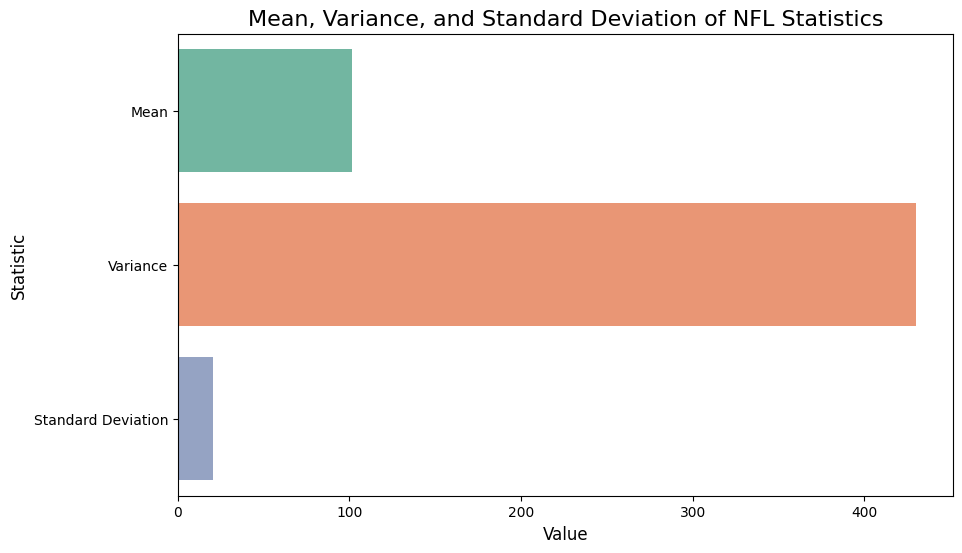

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document

# Path to your document
doc_path = r"C:\Users\jamar\Downloads\GCU_DSC_510_Discussion_Post_NFL_Statistics_Example.docx"

# Load the document
doc = Document(doc_path)

# Initialize a list to store table data
table_data = []

# Extract data from the document
for table in doc.tables:
    for row in table.rows:
        row_data = [cell.text.strip() for cell in row.cells]  # Strip whitespace
        table_data.append(row_data)

# Convert to DataFrame (assuming first row is the header)
if table_data:  # Check if there is any table data
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
else:
    df = pd.DataFrame()  # Create an empty DataFrame

# Display the DataFrame
print("\nDataFrame:")
print(df)

# Check if the DataFrame is empty
if df.empty:
    print("No data available to plot.")
else:
    # Extracting relevant statistics from the 'Statistic' column
    # This assumes you have mean, variance, and standard deviation listed in your DataFrame
    stats_data = {
        'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
        'Values': [101.29, 430.05, 20.74]  # Sample values; replace with actual data extraction if necessary
    }
    stats_df = pd.DataFrame(stats_data)

    # Create a bar plot for mean, variance, and standard deviation
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Values', y='Statistic', data=stats_df, palette="Set2")
    plt.title('Mean, Variance, and Standard Deviation of NFL Statistics', fontsize=16)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Statistic', fontsize=12)
    plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document


# Path to your document
doc_path = r"C:\Users\jamar\Downloads\GCU_DSC_510_Discussion_Post_NFL_Statistics_Example.docx"


# Load the document
doc = Document(doc_path)


# Initialize a list to store table data
table_data = []


# Extract data from the document
for table in doc.tables:
    for row in table.rows:
        row_data = [cell.text.strip() for cell in row.cells]  # Strip whitespace
        table_data.append(row_data)


# Print the extracted table data
print("Extracted Table Data:")
for row in table_data:
    print(row)


# Convert to DataFrame (assuming first row is the header)
if table_data:  # Check if there is any table data
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
else:
    df = pd.DataFrame()  # Create an empty DataFrame


# Display the DataFrame
print("\nDataFrame:")
print(df)


# Check if the DataFrame is empty
if df.empty:
    print("No data available to plot.")
else:
    # Convert columns to numeric where possible
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna(axis=1, how='all')  # Drop columns with all NaN values


    # Create a figure with subplots
    num_features = len(df.columns)
    if num_features > 0:
        fig, axs = plt.subplots(2, (num_features + 1) // 2, figsize=(20, 10))
        axs = axs.flatten()  # Flatten the array of axes for easy iteration


        # Boxplots
        for idx, column in enumerate(df.columns):
            if pd.api.types.is_numeric_dtype(df[column]):
                sns.boxplot(data=df, y=column, ax=axs[idx], palette="Set2")
                axs[idx].set_title(f'Boxplot of {column}', fontsize=16)
                axs[idx].set_ylabel('Values')
                axs[idx].set_xlabel(column)
            else:
                axs[idx].remove()  # Remove the subplot if the data is not numeric


        plt.tight_layout()
        plt.show()


        # Now, let's create histograms in a new figure
        fig, axs = plt.subplots(2, (num_features + 1) // 2, figsize=(20, 10))
        axs = axs.flatten()


        for idx, column in enumerate(df.columns):
            if pd.api.types.is_numeric_dtype(df[column]):
                sns.histplot(df[column], ax=axs[idx], bins=15, kde=True, color='blue')
                axs[idx].set_title(f'Histogram of {column}', fontsize=16)
                axs[idx].set_ylabel('Frequency')
                axs[idx].set_xlabel(column)
            else:
                axs[idx].remove()  # Remove the subplot if the data is not numeric


        plt.tight_layout()
        plt.show()

Extracted Table Data:
['Concept', 'Definition', 'NFL Example']
['Population', 'Entire group of interest', 'QBS Caleb Williams, Joe Burrow, Josh Allen, Bo Nix, Deshaun Watson, Baker Mayfield, Kyler Murray, Justin Herbert, Patrick Mahomes, Jayden Daniels, Anthony Richardson, Dak Prescott, Tua Tagovailoa, Jalen Hurts, Kirk Cousins, Brock Purdy, Daniel Jones, Trevor Lawrence, Aaron Rodgers, Jared Goff, Jordan Love, Andy Dalton, Jacoby Brissett,  Aidan O’Connell, Matthew Stafford, Lamar Jackson, Derek Carr, Geno Smith, Justin Fields, CJ Stroud, Will Levis, Sam Darnold']
['Sample', 'A subset of the population', '(random selection) \nTrevor Lawrence 56.3, Andy Dalton 64.4, Kyler Murray 90.7, Anthony Richardson 94.0, Jared Goff 100.6, CJ Stroud 102.6, Patrick Mahomes 113.7, Deshaun Watson 89.5, Jalen Hurts 106.9, Kirk Cousins 94.2.']
['Parameter', 'A measure describing the entire population', "Patrick Mahomes (KC) - 113.7, Joe Burrow (CIN) - 112.4, Josh Allen (BUF) - 109.1, Lamar Jackson (BAL)